# ライブラリのインポート

In [1]:
import os
import pandas as pd

# 想定
### 実行PATHの設定
- `sales_dashboard` ディレクトリから実行

In [6]:
%cd {os.environ["PYTHONPATH"]}

D:\git_workspaces\portfolios\sales_dashboard


# データの読み込み

### 生データのダウンロード方法
- [../data/sample_sales_data/README.md](../data/sales_data_sample/README.md)

### 生データファイルPATHを設定
- `sales_dashboard/data/sales_data_sample/` 配下に格納した生データCSVファイル(`sales_data_sample.csv`)を利用する想定

### エンコードの設定
- 英語圏で作成されたファイルによく採用されている `ISO-8859-1` に設定

In [11]:
# 生データファイルPATH
RAW_DATA_FILE_PATH = f'{os.environ["PYTHONPATH"]}/data/sales_data_sample/sales_data_sample.csv'

# 読み込み
df_raw = pd.read_csv(RAW_DATA_FILE_PATH, encoding='ISO-8859-1')

# 各カラムの情報を確認
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


# 各列の値や分布を確認
|  No | カラム名               | 型       | 意味・特徴                                         |
| :-: | :----------------- | :------ | :-------------------------------------------- |
|  0  | `ORDERNUMBER`      | int64   | 注文番号（各注文を一意に識別）                               |
|  1  | `QUANTITYORDERED`  | int64   | 注文数（1注文あたりの商品数）                               |
|  2  | `PRICEEACH`        | float64 | 商品単価                                          |
|  3  | `ORDERLINENUMBER`  | int64   | 注文内の商品行番号（1つの注文に複数商品がある場合に区別）                 |
|  4  | `SALES`            | float64 | 注文行の売上（`QUANTITYORDERED` × `PRICEEACH` などで計算） |
|  5  | `ORDERDATE`        | object  | 注文日（文字列型、日時として扱うには変換必要）                       |
|  6  | `STATUS`           | object  | 注文ステータス（Shipped, Cancelled など）                |
|  7  | `QTR_ID`           | int64   | 注文四半期（1=Q1, 2=Q2...）                          |
|  8  | `MONTH_ID`         | int64   | 注文月（1〜12）                                     |
|  9  | `YEAR_ID`          | int64   | 注文年（例: 2003, 2004）                            |
|  10 | `PRODUCTLINE`      | object  | 商品カテゴリ（Classic Cars, Motorcycles など）          |
|  11 | `MSRP`             | int64   | メーカー希望小売価格                                    |
|  12 | `PRODUCTCODE`      | object  | 商品コード                                         |
|  13 | `CUSTOMERNAME`     | object  | 顧客名                                           |
|  14 | `PHONE`            | object  | 顧客の電話番号                                       |
|  15 | `ADDRESSLINE1`     | object  | 住所（1行目）                                       |
|  16 | `ADDRESSLINE2`     | object  | 住所（2行目：NULL多め）                                |
|  17 | `CITY`             | object  | 市区町村名                                         |
|  18 | `STATE`            | object  | 州（NULL多め: 国によっては空欄）                           |
|  19 | `POSTALCODE`       | object  | 郵便番号（NULLもあり）                                 |
|  20 | `COUNTRY`          | object  | 国名                                            |
|  21 | `TERRITORY`        | object  | 販売地域（NULLもあり）                                 |
|  22 | `CONTACTLASTNAME`  | object  | 顧客担当者の名字                                      |
|  23 | `CONTACTFIRSTNAME` | object  | 顧客担当者の名前                                      |
|  24 | `DEALSIZE`         | object  | 取引規模（Small, Medium, Large など）                 |


### ORDERNUMBER
- 受注番号

<Axes: >

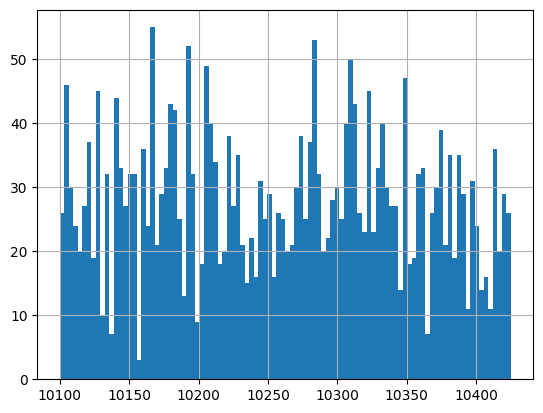

In [13]:
df_raw["ORDERNUMBER"].hist(bins=100)

### QUANTITYORDERED
- 受注数量

<Axes: >

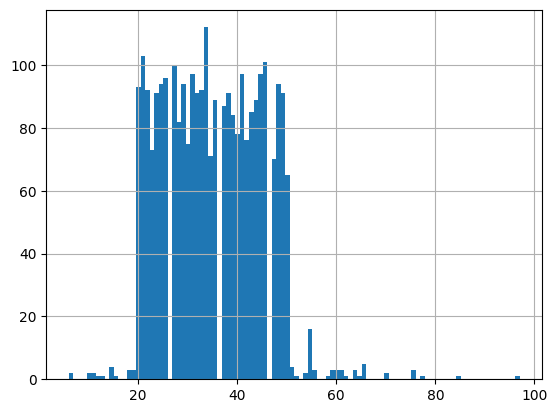

In [15]:
df_raw["QUANTITYORDERED"].hist(bins=100)

### PRICEEACH

|  No | カラム名               | 型       | 意味・特徴                                         |
| :-: | :----------------- | :------ | :-------------------------------------------- |
|  0  | `ORDERNUMBER`      | int64   | 注文番号（各注文を一意に識別）                               |
|  1  | `QUANTITYORDERED`  | int64   | 注文数（1注文あたりの商品数）                               |
|  2  | `PRICEEACH`        | float64 | 商品単価                                          |
|  3  | `ORDERLINENUMBER`  | int64   | 注文内の商品行番号（1つの注文に複数商品がある場合に区別）                 |
|  4  | `SALES`            | float64 | 注文行の売上（`QUANTITYORDERED` × `PRICEEACH` などで計算） |
|  5  | `ORDERDATE`        | object  | 注文日（文字列型、日時として扱うには変換必要）                       |
|  6  | `STATUS`           | object  | 注文ステータス（Shipped, Cancelled など）                |
|  7  | `QTR_ID`           | int64   | 注文四半期（1=Q1, 2=Q2...）                          |
|  8  | `MONTH_ID`         | int64   | 注文月（1〜12）                                     |
|  9  | `YEAR_ID`          | int64   | 注文年（例: 2003, 2004）                            |
|  10 | `PRODUCTLINE`      | object  | 商品カテゴリ（Classic Cars, Motorcycles など）          |
|  11 | `MSRP`             | int64   | メーカー希望小売価格                                    |
|  12 | `PRODUCTCODE`      | object  | 商品コード                                         |
|  13 | `CUSTOMERNAME`     | object  | 顧客名                                           |
|  14 | `PHONE`            | object  | 顧客の電話番号                                       |
|  15 | `ADDRESSLINE1`     | object  | 住所（1行目）                                       |
|  16 | `ADDRESSLINE2`     | object  | 住所（2行目：NULL多め）                                |
|  17 | `CITY`             | object  | 市区町村名                                         |
|  18 | `STATE`            | object  | 州（NULL多め: 国によっては空欄）                           |
|  19 | `POSTALCODE`       | object  | 郵便番号（NULLもあり）                                 |
|  20 | `COUNTRY`          | object  | 国名                                            |
|  21 | `TERRITORY`        | object  | 販売地域（NULLもあり）                                 |
|  22 | `CONTACTLASTNAME`  | object  | 顧客担当者の名字                                      |
|  23 | `CONTACTFIRSTNAME` | object  | 顧客担当者の名前                                      |
|  24 | `DEALSIZE`         | object  | 取引規模（Small, Medium, Large など）                 |


In [16]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 
